# SPINN

In [ ]:
from setproctitle import setproctitle
setproctitle("SPINN (series)")

In [ ]:
import os 
import glob 
from pathlib import Path
import numpy as np

In [ ]:
os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"] = "false"
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]= "3"

In [ ]:
from cmspinn.prepare_hmi import PrepareHMI

b_bottom_path = os.path.expanduser('~/workspace/_data/NOAA12673/b_bottom')
hmi_path = '/mnt/obsdata/sdo_AR/NOAA12673_HARP7115/hmi/'

creater = PrepareHMI(b_bottom_path, hmi_path)

creater.load_hmi_data(idx1=247, idx2=270)

[('/mnt/obsdata/sdo_AR/NOAA12673_HARP7115/hmi/hmi.sharp_cea_720s.7115.20170906_083600_TAI.Bp.fits',
  '/mnt/obsdata/sdo_AR/NOAA12673_HARP7115/hmi/hmi.sharp_cea_720s.7115.20170906_083600_TAI.Bt.fits',
  '/mnt/obsdata/sdo_AR/NOAA12673_HARP7115/hmi/hmi.sharp_cea_720s.7115.20170906_083600_TAI.Br.fits'),
 ('/mnt/obsdata/sdo_AR/NOAA12673_HARP7115/hmi/hmi.sharp_cea_720s.7115.20170906_084800_TAI.Bp.fits',
  '/mnt/obsdata/sdo_AR/NOAA12673_HARP7115/hmi/hmi.sharp_cea_720s.7115.20170906_084800_TAI.Bt.fits',
  '/mnt/obsdata/sdo_AR/NOAA12673_HARP7115/hmi/hmi.sharp_cea_720s.7115.20170906_084800_TAI.Br.fits'),
 ('/mnt/obsdata/sdo_AR/NOAA12673_HARP7115/hmi/hmi.sharp_cea_720s.7115.20170906_090000_TAI.Bp.fits',
  '/mnt/obsdata/sdo_AR/NOAA12673_HARP7115/hmi/hmi.sharp_cea_720s.7115.20170906_090000_TAI.Bt.fits',
  '/mnt/obsdata/sdo_AR/NOAA12673_HARP7115/hmi/hmi.sharp_cea_720s.7115.20170906_090000_TAI.Br.fits'),
 ('/mnt/obsdata/sdo_AR/NOAA12673_HARP7115/hmi/hmi.sharp_cea_720s.7115.20170906_091200_TAI.Bp.fits

In [ ]:
creater.save_bottom(stride=2)

Exist /userhome/jeon_mg/workspace/_data/NOAA12673/b_bottom/b_bottom_20170906_083600.npy
Exist /userhome/jeon_mg/workspace/_data/NOAA12673/b_bottom/b_bottom_20170906_084800.npy
Exist /userhome/jeon_mg/workspace/_data/NOAA12673/b_bottom/b_bottom_20170906_090000.npy
Exist /userhome/jeon_mg/workspace/_data/NOAA12673/b_bottom/b_bottom_20170906_091200.npy
Exist /userhome/jeon_mg/workspace/_data/NOAA12673/b_bottom/b_bottom_20170906_092400.npy
Exist /userhome/jeon_mg/workspace/_data/NOAA12673/b_bottom/b_bottom_20170906_093600.npy
Exist /userhome/jeon_mg/workspace/_data/NOAA12673/b_bottom/b_bottom_20170906_094800.npy
Exist /userhome/jeon_mg/workspace/_data/NOAA12673/b_bottom/b_bottom_20170906_100000.npy
Exist /userhome/jeon_mg/workspace/_data/NOAA12673/b_bottom/b_bottom_20170906_101200.npy
Exist /userhome/jeon_mg/workspace/_data/NOAA12673/b_bottom/b_bottom_20170906_102400.npy
Exist /userhome/jeon_mg/workspace/_data/NOAA12673/b_bottom/b_bottom_20170906_103600.npy
Exist /userhome/jeon_mg/workspac

In [ ]:
spinn_output_path = os.path.join(Path(b_bottom_path).parent, 'SPINN')
Path(spinn_output_path).mkdir(parents=True, exist_ok=True)

In [ ]:
b_bottom_list = sorted(glob.glob(os.path.join(b_bottom_path, '*.npy')))
# b_bottom_list = b_bottom_list[:5]
b_bottom_list

['/userhome/jeon_mg/workspace/_data/NOAA12673/b_bottom/b_bottom_20170906_083600.npy',
 '/userhome/jeon_mg/workspace/_data/NOAA12673/b_bottom/b_bottom_20170906_084800.npy',
 '/userhome/jeon_mg/workspace/_data/NOAA12673/b_bottom/b_bottom_20170906_090000.npy',
 '/userhome/jeon_mg/workspace/_data/NOAA12673/b_bottom/b_bottom_20170906_091200.npy',
 '/userhome/jeon_mg/workspace/_data/NOAA12673/b_bottom/b_bottom_20170906_092400.npy',
 '/userhome/jeon_mg/workspace/_data/NOAA12673/b_bottom/b_bottom_20170906_093600.npy',
 '/userhome/jeon_mg/workspace/_data/NOAA12673/b_bottom/b_bottom_20170906_094800.npy',
 '/userhome/jeon_mg/workspace/_data/NOAA12673/b_bottom/b_bottom_20170906_100000.npy',
 '/userhome/jeon_mg/workspace/_data/NOAA12673/b_bottom/b_bottom_20170906_101200.npy',
 '/userhome/jeon_mg/workspace/_data/NOAA12673/b_bottom/b_bottom_20170906_102400.npy',
 '/userhome/jeon_mg/workspace/_data/NOAA12673/b_bottom/b_bottom_20170906_103600.npy',
 '/userhome/jeon_mg/workspace/_data/NOAA12673/b_bottom

In [ ]:
Nz = 160

b_norm = 2500
total_iterations = 10000
log_interval = 1000
loss_threshold = 1e-3

series_iterations = 200
series_log_interval = 20
series_lr = 5e-5


with open(b_bottom_list[0], 'rb') as f:
    b_bottom = np.load(f)

Nx, Ny, _ = b_bottom.shape

features = 256
n_layers = 3
r = 256
mlp = 'modified_mlp'

feat_sizes = tuple([features for _ in range(n_layers)]) 
out_dim = 3 
lr = 5e-4
lr_decay_iterations = total_iterations
decay_rate = 0.98

pos_enc = 0

spatial_norm = 160
n_max_x = (Nx/spatial_norm)
n_max_y = (Ny/spatial_norm)
n_max_z = (Nz/spatial_norm)

w_ff = 0.1
w_div = 1

w_bc = 1
w_bc_decay_iterations = None

is_random = False
Nc = 32
random_interval = 1
Ncx = None
Ncy = None
Ncz = None

bc_batch_size = None

choice = True

parameters = {'feat_sizes' : feat_sizes, 
    'r' : r, 
    'out_dim' : out_dim, 
    'Nx' : Nx, 
    'Ny' : Ny, 
    'Nz' : Nz, 
    'b_norm' : b_norm,
    'pos_enc' : pos_enc,
    'mlp' : mlp,
    'lr': lr,
    'series_lr': series_lr,
    'lr_decay_iterations': lr_decay_iterations,
    'n_max_x': n_max_x,
    'n_max_y': n_max_y,
    'n_max_z': n_max_z,
    'is_random':is_random,
    'Nc':Nc,
    'random_interval':random_interval,
    'w_ff': w_ff,
    'w_div': w_div,
    'w_bc': w_bc,
    'w_bc_decay_iterations': w_bc_decay_iterations,
    'Ncx': Ncx,
    'Ncy': Ncy,
    'Ncz': Ncz,
    'bc_batch_size': bc_batch_size,
    'choice': choice,
    'decay_rate': decay_rate}

In [ ]:
from cmspinn.potential_field import cal_and_save_potential_boundary_for_spinn
from cmspinn.spinn_trainer import SPINN_Trainer
import matplotlib.pyplot as plt

transfer_learning_path = None

for b_bottom_path in b_bottom_list:
    b_bottom_date = os.path.basename(b_bottom_path)[9:-4]
    output_path = os.path.join(spinn_output_path, b_bottom_date)
    os.makedirs(output_path, exist_ok=True)

    final_params_path = os.path.join(output_path, 'final_params.pickle')
    if os.path.exists(final_params_path):
        print('Exist', final_params_path)
        transfer_learning_path = final_params_path
        continue
    
    with open(b_bottom_path, 'rb') as f:
        b_bottom = np.load(f)

    BC_path = os.path.join(output_path, 'BC.pickle')
    if not os.path.exists(BC_path):
        cal_and_save_potential_boundary_for_spinn(b_bottom, Nz, b_norm, BC_path)  

    print(b_bottom_date)
    print('transfer_learning', transfer_learning_path)
    trainer = SPINN_Trainer(output_path, BC_path, b_bottom, Nz, b_norm, transfer_learning_path=transfer_learning_path, parameters=parameters)
    
    if transfer_learning_path is None:
        epochs = total_iterations
        log_int = log_interval
    else:
        epochs = series_iterations
        log_int = series_log_interval
    
    trainer.train(epochs, log_int, loss_threshold=loss_threshold)

    with open(os.path.join(output_path, 'losses.npy'), "rb") as f:
        losses = np.load(f)

    fig, ax = plt.subplots(figsize=(4,3))
    ax.plot(losses)
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Loss')
    ax.set_title('SPINN')
    plt.tight_layout()
    plt.savefig(os.path.join(output_path, 'loss_SPINN.png'), dpi=300)
    
    transfer_learning_path = os.path.join(output_path, 'final_params.pickle')

Exist /userhome/jeon_mg/workspace/_data/NOAA12673/SPINN/20170906_083600/final_params.pickle
Exist /userhome/jeon_mg/workspace/_data/NOAA12673/SPINN/20170906_084800/final_params.pickle
Exist /userhome/jeon_mg/workspace/_data/NOAA12673/SPINN/20170906_090000/final_params.pickle
Exist /userhome/jeon_mg/workspace/_data/NOAA12673/SPINN/20170906_091200/final_params.pickle
Exist /userhome/jeon_mg/workspace/_data/NOAA12673/SPINN/20170906_092400/final_params.pickle
Exist /userhome/jeon_mg/workspace/_data/NOAA12673/SPINN/20170906_093600/final_params.pickle
Exist /userhome/jeon_mg/workspace/_data/NOAA12673/SPINN/20170906_094800/final_params.pickle
Exist /userhome/jeon_mg/workspace/_data/NOAA12673/SPINN/20170906_100000/final_params.pickle
Exist /userhome/jeon_mg/workspace/_data/NOAA12673/SPINN/20170906_101200/final_params.pickle
Exist /userhome/jeon_mg/workspace/_data/NOAA12673/SPINN/20170906_102400/final_params.pickle
Exist /userhome/jeon_mg/workspace/_data/NOAA12673/SPINN/20170906_103600/final_pa

In [ ]:
import pyvista as pv
pv.global_theme.trame.server_proxy_enabled = True
pv.set_jupyter_backend('static')

In [ ]:
from cmspinn.spinn_trainer import spinn_cube

for b_bottom_path in b_bottom_list:
    b_bottom_date = os.path.basename(b_bottom_path)[9:-4]
    output_path = os.path.join(spinn_output_path, b_bottom_date)

    final_model_path = os.path.join(output_path, 'final_params.pickle')
    parameters_path = os.path.join(output_path, 'parameters.pickle')

    B_spinn_vtk_path = os.path.join(output_path, 'B_spinn_final.vtk')

    if not os.path.exists(B_spinn_vtk_path):
        spinn = spinn_cube(final_model_path, parameters_path)
        spinn.calculate_magnetic_fields()

        spinn.grid.save(B_spinn_vtk_path)
        print(f'Saved {B_spinn_vtk_path}')

    else:
        print(f'Exist {B_spinn_vtk_path}')

Exist /userhome/jeon_mg/workspace/_data/NOAA12673/SPINN/20170906_083600/B_spinn_final.vtk
Exist /userhome/jeon_mg/workspace/_data/NOAA12673/SPINN/20170906_084800/B_spinn_final.vtk
Exist /userhome/jeon_mg/workspace/_data/NOAA12673/SPINN/20170906_090000/B_spinn_final.vtk
Exist /userhome/jeon_mg/workspace/_data/NOAA12673/SPINN/20170906_091200/B_spinn_final.vtk
Exist /userhome/jeon_mg/workspace/_data/NOAA12673/SPINN/20170906_092400/B_spinn_final.vtk
Exist /userhome/jeon_mg/workspace/_data/NOAA12673/SPINN/20170906_093600/B_spinn_final.vtk
Exist /userhome/jeon_mg/workspace/_data/NOAA12673/SPINN/20170906_094800/B_spinn_final.vtk
Exist /userhome/jeon_mg/workspace/_data/NOAA12673/SPINN/20170906_100000/B_spinn_final.vtk
Exist /userhome/jeon_mg/workspace/_data/NOAA12673/SPINN/20170906_101200/B_spinn_final.vtk
Exist /userhome/jeon_mg/workspace/_data/NOAA12673/SPINN/20170906_102400/B_spinn_final.vtk
Exist /userhome/jeon_mg/workspace/_data/NOAA12673/SPINN/20170906_103600/B_spinn_final.vtk
Exist /use

In [ ]:
from cmspinn.potential_field import potential_cube

for b_bottom_path in b_bottom_list:
    b_bottom_date = os.path.basename(b_bottom_path)[9:-4]
    output_path = os.path.join(spinn_output_path, b_bottom_date)

    b_pot_vtk_path = os.path.join(output_path, 'b_potential.vtk')

    if not os.path.exists(b_pot_vtk_path):
        with open(b_bottom_path, 'rb') as f:
            b_bottom = np.load(f)

        bz_bottom = b_bottom[:, :, 2]
        potential_maker = potential_cube(bz_bottom, Nz)

        potential_maker.cal_and_save_potential_field(b_pot_vtk_path, batch_size=1000)

        print(f'Saved {b_pot_vtk_path}')

    else:
        print(f'Exist {b_pot_vtk_path}')

Exist /userhome/jeon_mg/workspace/_data/NOAA12673/SPINN/20170906_083600/b_potential.vtk
Exist /userhome/jeon_mg/workspace/_data/NOAA12673/SPINN/20170906_084800/b_potential.vtk
Exist /userhome/jeon_mg/workspace/_data/NOAA12673/SPINN/20170906_090000/b_potential.vtk
Exist /userhome/jeon_mg/workspace/_data/NOAA12673/SPINN/20170906_091200/b_potential.vtk
Exist /userhome/jeon_mg/workspace/_data/NOAA12673/SPINN/20170906_092400/b_potential.vtk


Potential Field: 100%|██████████| 12329/12329 [02:55<00:00, 70.25it/s]


Saved /userhome/jeon_mg/workspace/_data/NOAA12673/SPINN/20170906_093600/b_potential.vtk


Potential Field: 100%|██████████| 12329/12329 [02:55<00:00, 70.35it/s]


Saved /userhome/jeon_mg/workspace/_data/NOAA12673/SPINN/20170906_094800/b_potential.vtk


Potential Field: 100%|██████████| 12329/12329 [02:55<00:00, 70.19it/s]


Saved /userhome/jeon_mg/workspace/_data/NOAA12673/SPINN/20170906_100000/b_potential.vtk


Potential Field: 100%|██████████| 12329/12329 [02:55<00:00, 70.34it/s]


Saved /userhome/jeon_mg/workspace/_data/NOAA12673/SPINN/20170906_101200/b_potential.vtk


Potential Field: 100%|██████████| 12329/12329 [02:55<00:00, 70.25it/s]


Saved /userhome/jeon_mg/workspace/_data/NOAA12673/SPINN/20170906_102400/b_potential.vtk


Potential Field: 100%|██████████| 12329/12329 [02:54<00:00, 70.52it/s]


Saved /userhome/jeon_mg/workspace/_data/NOAA12673/SPINN/20170906_103600/b_potential.vtk


Potential Field: 100%|██████████| 12329/12329 [02:55<00:00, 70.41it/s]


Saved /userhome/jeon_mg/workspace/_data/NOAA12673/SPINN/20170906_104800/b_potential.vtk


Potential Field: 100%|██████████| 12329/12329 [02:55<00:00, 70.38it/s]


Saved /userhome/jeon_mg/workspace/_data/NOAA12673/SPINN/20170906_110000/b_potential.vtk


Potential Field: 100%|██████████| 12329/12329 [02:54<00:00, 70.48it/s]


Saved /userhome/jeon_mg/workspace/_data/NOAA12673/SPINN/20170906_111200/b_potential.vtk


Potential Field: 100%|██████████| 12329/12329 [02:55<00:00, 70.15it/s]


Saved /userhome/jeon_mg/workspace/_data/NOAA12673/SPINN/20170906_112400/b_potential.vtk


Potential Field: 100%|██████████| 12329/12329 [02:54<00:00, 70.48it/s]


Saved /userhome/jeon_mg/workspace/_data/NOAA12673/SPINN/20170906_113600/b_potential.vtk


Potential Field: 100%|██████████| 12329/12329 [02:54<00:00, 70.51it/s]


Saved /userhome/jeon_mg/workspace/_data/NOAA12673/SPINN/20170906_114800/b_potential.vtk


Potential Field: 100%|██████████| 12329/12329 [02:55<00:00, 70.26it/s]


Saved /userhome/jeon_mg/workspace/_data/NOAA12673/SPINN/20170906_120000/b_potential.vtk


Potential Field: 100%|██████████| 12329/12329 [02:55<00:00, 70.19it/s]


Saved /userhome/jeon_mg/workspace/_data/NOAA12673/SPINN/20170906_121200/b_potential.vtk


Potential Field: 100%|██████████| 12329/12329 [02:55<00:00, 70.24it/s]


Saved /userhome/jeon_mg/workspace/_data/NOAA12673/SPINN/20170906_122400/b_potential.vtk


Potential Field: 100%|██████████| 12329/12329 [02:55<00:00, 70.29it/s]


Saved /userhome/jeon_mg/workspace/_data/NOAA12673/SPINN/20170906_123600/b_potential.vtk


Potential Field: 100%|██████████| 12329/12329 [02:55<00:00, 70.16it/s]


Saved /userhome/jeon_mg/workspace/_data/NOAA12673/SPINN/20170906_124800/b_potential.vtk


Potential Field: 100%|██████████| 12329/12329 [02:55<00:00, 70.38it/s]


Saved /userhome/jeon_mg/workspace/_data/NOAA12673/SPINN/20170906_130000/b_potential.vtk


In [ ]:
from cmspinn.evaluation import magnetic_energy, divergence, magnitude, curl, laplacian_vector
import pickle

stride = 2
Mm_per_pixel = stride*0.36
cm_per_pixel = Mm_per_pixel*1e8
dV = cm_per_pixel ** 3

for b_bottom_path in b_bottom_list:
    b_bottom_date = os.path.basename(b_bottom_path)[9:-4]
    output_path = os.path.join(spinn_output_path, b_bottom_date)

    result_path = os.path.join(output_path, 'result.pickle')

    if not os.path.exists(result_path):
        B_spinn_vtk_path = os.path.join(output_path, 'B_spinn_final.vtk')
        b_pot_vtk_path = os.path.join(output_path, 'b_potential.vtk')

        B_spinn_mesh = pv.read(B_spinn_vtk_path)
        b_pot_mesh = pv.read(b_pot_vtk_path)

        B_spinn = B_spinn_mesh['B'].reshape(Nz, Ny, Nx, 3).transpose(2, 1, 0, 3)
        b_pot = b_pot_mesh['B'].reshape(Nz, Ny, Nx, 3).transpose(2, 1, 0, 3)

        j = curl(B_spinn)
        jmaps = magnitude(j).sum(2)

        divergence_val = (divergence(B_spinn)**2)
        force_free = magnitude(np.cross(curl(B_spinn), B_spinn))

        me = magnetic_energy(B_spinn) * dV
        pot_me = magnetic_energy(b_pot) * dV
        free_me = me - pot_me 

        result = {
                'total_energy': me.sum(),
                'total_potential_energy': pot_me.sum(),
                'total_free_energy': free_me.sum(),
                'mean_divergence': divergence_val.mean(),
                'mean_force_free': force_free.mean(),
                'j_map': magnitude(j).sum(2),
                'energy_map': me.sum(2),
                'potential_energy_map': pot_me.sum(2),
                'free_energy_map': free_me.sum(2),
                # 'laplacian_map': magnitude(laplacian).sum(2),
                }

        with open(result_path, "wb") as f:
            pickle.dump(result, f)
    
    else:
        print('Exist', result_path)
        with open(result_path, "rb") as f:
            result = pickle.load(f)
    

    print(b_bottom_date)
    print('Div', result['mean_divergence'])
    print('FF', result['mean_force_free'])
    print('Free energy', result['total_free_energy'])
    print()

    # fig, ax = plt.subplots(figsize=(4,3))
    # ax.imshow(result['j_map'].T, origin='lower',  cmap='viridis')
    # ax.set_xlabel('x')
    # ax.set_ylabel('y')
    # ax.set_title(f'J {b_bottom_date}')
    # plt.tight_layout()
    # plt.savefig(os.path.join(output_path, 'j_map.png'), dpi=300)

    # fig, ax = plt.subplots(figsize=(4,3))
    # ax.imshow(result['free_energy_map'].T, origin='lower',  cmap='viridis')
    # ax.set_xlabel('x')
    # ax.set_ylabel('y')
    # ax.set_title(f'Free energy {b_bottom_date}')
    # plt.tight_layout()
    # plt.savefig(os.path.join(output_path, 'free_energy_map.png'), dpi=300)

Exist /userhome/jeon_mg/workspace/_data/NOAA12673/SPINN/20170906_083600/result.pickle
20170906_083600
Div 0.06698062
FF 84.674644
Free energy 5.9588286e+32

Exist /userhome/jeon_mg/workspace/_data/NOAA12673/SPINN/20170906_084800/result.pickle
20170906_084800
Div 0.034271426
FF 84.07376
Free energy 6.188311e+32

Exist /userhome/jeon_mg/workspace/_data/NOAA12673/SPINN/20170906_090000/result.pickle
20170906_090000
Div 0.03355369
FF 84.598625
Free energy 6.0326567e+32

Exist /userhome/jeon_mg/workspace/_data/NOAA12673/SPINN/20170906_091200/result.pickle
20170906_091200
Div 0.029611368
FF 84.35952
Free energy 5.2288777e+32

Exist /userhome/jeon_mg/workspace/_data/NOAA12673/SPINN/20170906_092400/result.pickle
20170906_092400
Div 0.032580953
FF 82.33039
Free energy 5.6867116e+32

20170906_093600
Div 0.03352329
FF 81.71337
Free energy 5.7950395e+32

20170906_094800
Div 0.034281015
FF 82.260155
Free energy 5.9750155e+32

20170906_100000
Div 0.034072332
FF 82.47461
Free energy 5.898461e+32

2017

In [ ]:
import datetime as dt

series_results_path = os.path.join(spinn_output_path, 'series_results.pickle')

if not os.path.exists(series_results_path):

    results = []

    for b_bottom_path in b_bottom_list:
        b_bottom_date = os.path.basename(b_bottom_path)[9:-4]
        output_path = os.path.join(spinn_output_path, b_bottom_date)

        result_path = os.path.join(output_path, 'result.pickle')

        if os.path.exists(result_path):
            with open(result_path, "rb") as f:
                result = pickle.load(f)
            result['date'] = dt.datetime.strptime(b_bottom_date, '%Y%m%d_%H%M%S')
        else:
            print('None', result_path)
            continue

        results.append(result)
        print(b_bottom_date)

    series_results = {k: [r[k] for r in results] for k in results[0].keys()}

    with open(series_results_path, 'wb') as f:
        pickle.dump(series_results, f)

else:
    with open(series_results_path, 'rb') as f:
        series_results = pickle.load(f)
    
    print('Exist', series_results_path)

20170906_083600
20170906_084800
20170906_090000
20170906_091200
20170906_092400
20170906_093600
20170906_094800
20170906_100000
20170906_101200
20170906_102400
20170906_103600
20170906_104800
20170906_110000
20170906_111200
20170906_112400
20170906_113600
20170906_114800
20170906_120000
20170906_121200
20170906_122400
20170906_123600
20170906_124800
20170906_130000


In [ ]:
series_results['total_free_energy']

[5.9588286e+32,
 6.188311e+32,
 6.0326567e+32,
 5.2288777e+32,
 5.6867116e+32,
 5.7950395e+32,
 5.9750155e+32,
 5.898461e+32,
 5.9805943e+32,
 6.1411532e+32,
 6.1141414e+32,
 6.241555e+32,
 6.3870708e+32,
 6.179257e+32,
 6.3157724e+32,
 6.5418794e+32,
 6.633452e+32,
 4.918175e+32,
 5.2872144e+32,
 5.3312716e+32,
 4.883921e+32,
 5.0312193e+32,
 4.6713617e+32]

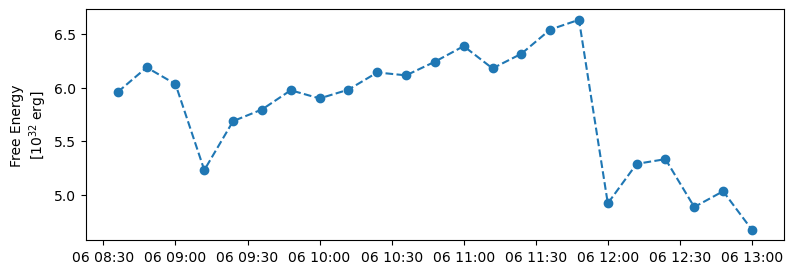

In [ ]:
plt.figure(figsize=(9, 3))
plt.plot(series_results['date'], np.array(series_results['total_free_energy']) * 1e-32, 'o--')
plt.ylabel('Free Energy\n[$10^{32}$ erg]')
plt.show()

In [ ]:
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.animation as animation
from IPython.display import HTML

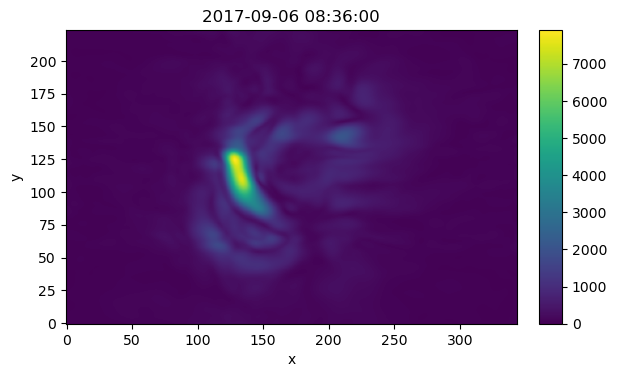

In [ ]:
fig, ax = plt.subplots()
div = make_axes_locatable(ax)
cax = div.append_axes('right', '5%', '5%')

ax.set_xlabel('x')
ax.set_ylabel('y')

dates = series_results['date']
j_maps = np.array(series_results['j_map'])
vmax = j_maps.max()

def update(frame_number):
    cax.cla()
    im = ax.imshow(j_maps[frame_number, ...].T, origin='lower', norm=Normalize(vmin=0, vmax=vmax), cmap='viridis')
    fig.colorbar(im, cax=cax)
    ax.set_title(dates[frame_number])

ani = animation.FuncAnimation(fig, update, frames=len(dates))
HTML(ani.to_html5_video())

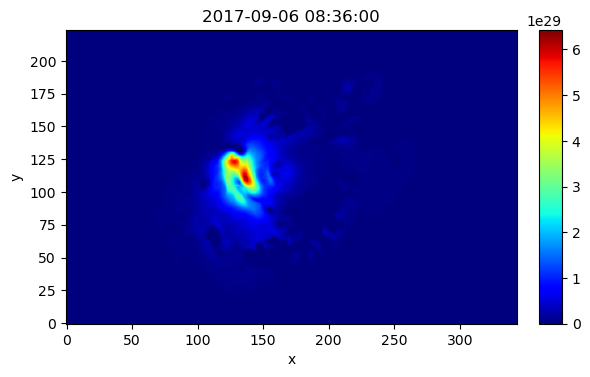

In [ ]:
fig, ax = plt.subplots()
div = make_axes_locatable(ax)
cax = div.append_axes('right', '5%', '5%')

ax.set_xlabel('x')
ax.set_ylabel('y')

dates = series_results['date']
free_energy_maps = np.array(series_results['free_energy_map'])
vmax = free_energy_maps.max()

def update(frame_number):
    cax.cla()
    im = ax.imshow(free_energy_maps[frame_number, ...].T, origin='lower', norm=Normalize(vmin=0, vmax=vmax), cmap='jet')
    fig.colorbar(im, cax=cax)
    ax.set_title(dates[frame_number])

ani = animation.FuncAnimation(fig, update, frames=len(dates))
HTML(ani.to_html5_video())

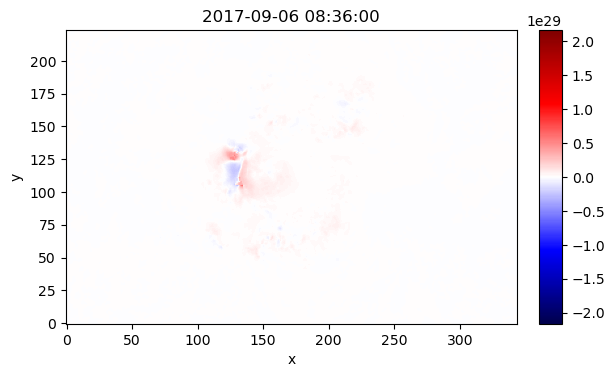

In [ ]:
fig, ax = plt.subplots()
div = make_axes_locatable(ax)
cax = div.append_axes('right', '5%', '5%')

ax.set_xlabel('x')
ax.set_ylabel('y')

dates = series_results['date']
free_energy_change_maps = np.gradient(np.array(series_results['free_energy_map']), axis=0)
v_min_max = np.max(np.abs(free_energy_change_maps))

def update(frame_number):
    cax.cla()
    im = ax.imshow(free_energy_change_maps[frame_number, ...].T, origin='lower', 
                   norm=Normalize(vmin=-v_min_max, vmax=v_min_max), cmap='seismic')
    fig.colorbar(im, cax=cax)
    ax.set_title(dates[frame_number])

ani = animation.FuncAnimation(fig, update, frames=len(dates))
HTML(ani.to_html5_video())

In [ ]:
vmin = -3000
vmax = 3000

i_siz = 160
j_siz = 100

i_res = 15
j_res = 15

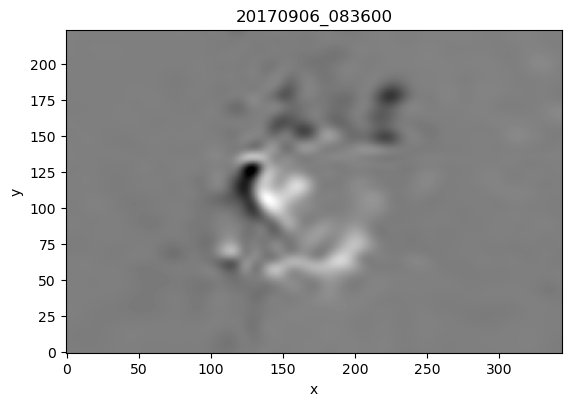

In [ ]:
from cmspinn.mag_viz import mag_plotter

fig, ax = plt.subplots()

def update(frame_number):
    ax.cla()
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    
    b_bottom_path = b_bottom_list[frame_number]
    b_bottom_date = os.path.basename(b_bottom_path)[9:-4]
    
    output_path = os.path.join(spinn_output_path, b_bottom_date)
    B_spinn_vtk_path = os.path.join(output_path, 'B_spinn_final.vtk')

    B_spinn_mesh = pv.read(B_spinn_vtk_path)
    B_spinn = mag_plotter(B_spinn_mesh)

    ax.imshow(B_spinn.B[:, :, 0, 2].transpose(), origin='lower', cmap='gray', vmin=vmin, vmax=vmax)
    ax.set_title(b_bottom_date)

ani = animation.FuncAnimation(fig, update, frames=len(b_bottom_list))
HTML(ani.to_html5_video())

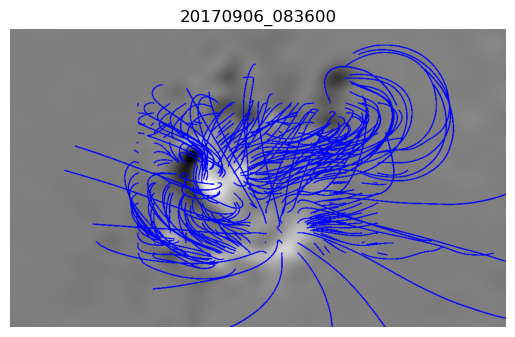

In [ ]:
fig, ax = plt.subplots()

def update(frame_number):
    ax.cla()
    ax.axis('off')
    
    b_bottom_path = b_bottom_list[frame_number]
    b_bottom_date = os.path.basename(b_bottom_path)[9:-4]

    output_path = os.path.join(spinn_output_path, b_bottom_date)
    B_spinn_vtk_path = os.path.join(output_path, 'B_spinn_final.vtk')

    B_spinn_mesh = pv.read(B_spinn_vtk_path)
    B_spinn = mag_plotter(B_spinn_mesh)
    
    B_spinn.create_mesh(i_siz=i_siz, j_siz=j_siz, 
                   i_resolution=i_res, j_resolution=j_res,
                   vmin=vmin, vmax=vmax)

    p = pv.Plotter(off_screen=True)
    p.add_mesh(B_spinn.grid.outline())
    p.add_mesh(B_spinn.bottom, cmap='gray', show_scalar_bar=False, **B_spinn.dargs_B)
    p.add_mesh(B_spinn.tube, lighting=False, color='blue')
    p.camera_position = 'xy'

    ax.imshow(p.screenshot(scale=2))
    ax.margins(x=-0.25, y=-0.3)
    ax.set_title(b_bottom_date)

ani = animation.FuncAnimation(fig, update, frames=len(b_bottom_list))
HTML(ani.to_html5_video())